In [29]:
import os

import numpy as np
import pandas as pd

import matplotlib
from matplotlib import patheffects
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
metric_quantile = 0.25
metric_percent = int(100 * metric_quantile)

In [31]:
df_all = pd.read_csv("../../analysis_data/all_data.csv")
df_all

/var/folders/3z/q1pyp9n929z2nh_1_69s7y_40000gn/T/ipykernel_27860/3863795917.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv("../../analysis_data/all_data.csv")


,density,edginess,citations_per_year,is_center,librarian,vectorizer,center,fields_of_study_0,references,identifier,year
0,1058.675939,0.977032,14.000000,False,S2,GPT2,hafenLowredshiftLymanLimit2017,Physics,NaN,NaN,NaN
1,1545.550332,0.814415,1.894737,False,S2,GPT2,hafenLowredshiftLymanLimit2017,Physics,NaN,NaN,NaN
2,186.395648,0.505732,21.714286,False,S2,GPT2,hafenLowredshiftLymanLimit2017,Physics,NaN,NaN,NaN
3,1501.911690,0.594145,1.500000,False,S2,GPT2,hafenLowredshiftLymanLimit2017,Physics,NaN,NaN,NaN
4,1846.261870,0.452021,3.363636,False,S2,GPT2,hafenLowredshiftLymanLimit2017,Physics,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
358657,48.730838,0.658585,3.500000,False,S2,SciBERT,Andre2018,Mathematics,41.0,806f77ba7bdf8a3b80cb859fb5f33f57c1d85d24,2018.0
358658,25.107589,0.721374,3.200000,False,S2,SciBERT,Andre2018,Mathematics,38.0,f40707d1165c22e185c25e6837977177ee380f2c,2015.0
358659,41.647954,0.646499,1.529412,False,S2,SciBERT,Andre2018,Mathematics,11.0,10636ee16779a7521001651164acb5c192d4ad7b,2003.0
358660,35.738649,0.708053,2.384615,False,S2,SciBERT,Andre2018,Mathematics,15.0,a229f829e0a5362d00e63781f687f40ede991635,2007.0


In [32]:
keys = df_all.vectorizer.unique()
keys

array(['GPT2', 'Word2Vec', 'BOW', 'SBERT', 'SciBERT'], dtype=object)

In [33]:
dfs = []
for key in keys:
    df = df_all[df_all["vectorizer"] == key]

    # Density categorization
    upper_quantile = df['density'].quantile(1 - metric_quantile)
    lower_quantile = df['density'].quantile(metric_quantile)
    df['density_cat'] = 'center'
    df.loc[df['density'] < lower_quantile, 'density_cat'] = f'lower {metric_percent}%'
    df.loc[df['density'] > upper_quantile, 'density_cat'] = f'upper {metric_percent}%'
    df = df.loc[df['density_cat'] != 'center']
    df['density_cat'] = df['density_cat'].astype('category')    

    # Vectorizer category already done

    dfs.append(df)

/var/folders/3z/q1pyp9n929z2nh_1_69s7y_40000gn/T/ipykernel_27860/2661227713.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['density_cat'] = 'center'
/var/folders/3z/q1pyp9n929z2nh_1_69s7y_40000gn/T/ipykernel_27860/2661227713.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['density_cat'] = 'center'
/var/folders/3z/q1pyp9n929z2nh_1_69s7y_40000gn/T/ipykernel_27860/2661227713.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

In [34]:
# Combine
df = pd.concat(dfs)
df

,density,edginess,citations_per_year,is_center,librarian,vectorizer,center,fields_of_study_0,references,identifier,year,density_cat
0,1058.675939,0.977032,14.000000,False,S2,GPT2,hafenLowredshiftLymanLimit2017,Physics,NaN,NaN,NaN,upper 25%
1,1545.550332,0.814415,1.894737,False,S2,GPT2,hafenLowredshiftLymanLimit2017,Physics,NaN,NaN,NaN,upper 25%
2,186.395648,0.505732,21.714286,False,S2,GPT2,hafenLowredshiftLymanLimit2017,Physics,NaN,NaN,NaN,upper 25%
3,1501.911690,0.594145,1.500000,False,S2,GPT2,hafenLowredshiftLymanLimit2017,Physics,NaN,NaN,NaN,upper 25%
4,1846.261870,0.452021,3.363636,False,S2,GPT2,hafenLowredshiftLymanLimit2017,Physics,NaN,NaN,NaN,upper 25%
...,...,...,...,...,...,...,...,...,...,...,...,...
358653,39.632257,0.690336,3.600000,False,S2,SciBERT,Andre2018,Mathematics,16.0,4b41c2044b31199983a6963c773356563177f014,2010.0,upper 25%
358654,40.763516,0.707587,5.500000,False,S2,SciBERT,Andre2018,Mathematics,37.0,5c2ae2fb5ad4d3c5ac8693f55a44c79e618112be,2018.0,upper 25%
358657,48.730838,0.658585,3.500000,False,S2,SciBERT,Andre2018,Mathematics,41.0,806f77ba7bdf8a3b80cb859fb5f33f57c1d85d24,2018.0,upper 25%
358658,25.107589,0.721374,3.200000,False,S2,SciBERT,Andre2018,Mathematics,38.0,f40707d1165c22e185c25e6837977177ee380f2c,2015.0,lower 25%


In [35]:
# Make a log scale version
df['log_cpy'] = np.log10(df['citations_per_year'])
df['log_cpy'] = df['log_cpy'].replace(-np.inf, np.nan)

/Users/nathanielimel/miniforge3/envs/citesim/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [36]:
# reset indices if necessary
print(len(df[df.index.duplicated()]))
df = df.reset_index()
print(len(df[df.index.duplicated()]))

0
0


/var/folders/3z/q1pyp9n929z2nh_1_69s7y_40000gn/T/ipykernel_27860/3204276458.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_center_by_density = df_center.groupby('density_cat')


Median fraction change: 1.29
Median std fraction change: 0.77



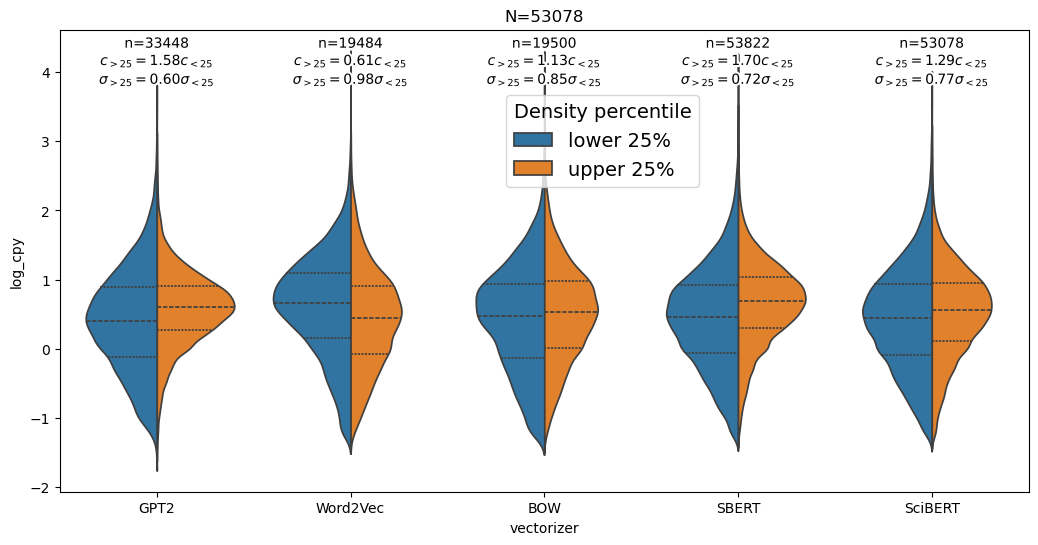

In [37]:
import matplotlib.transforms


fig = plt.figure(figsize=(len(keys) * 2.5, 6))
ax = plt.gca()

sns.violinplot(
    ax=ax,
    data=df,
    x='vectorizer',
    y='log_cpy',
    hue='density_cat',
    # palette='mako',
    split=True,
    inner='quart',
    dodge=True,
    gap=0,
)

# n = df[df["vectorizer"] == "SciBERT"].shape[0]

df_by_center = df.groupby('vectorizer')
fraction_changes = []
fraction_std_changes = []
for i, key in enumerate(keys):

    # Get the group
    df_center = df_by_center.get_group(key)
    n = df_center.shape[0]    

    # Median change
    df_center_by_density = df_center.groupby('density_cat')
    med_cpy = 10.**df_center_by_density['log_cpy'].median()
    fraction_change = med_cpy[f'upper {metric_percent}%'] / med_cpy[f'lower {metric_percent}%']
    fraction_changes.append(fraction_change)
    median_change_str = (
        fr'$c_{{>{metric_percent}}} = '
        f'{fraction_change:.2f}'
        fr'c_{{<{metric_percent}}}$'
    )

    # Median change in width
    std_cpy = 10.**df_center_by_density['log_cpy'].std()
    fraction_std_change =  std_cpy[f'upper {metric_percent}%'] / std_cpy[f'lower {metric_percent}%']
    fraction_std_changes.append(fraction_std_change)
    std_change_str = (
        fr'$\sigma_{{>{metric_percent}}} = '
        f'{fraction_std_change:.2f}'
        fr'\sigma_{{<{metric_percent}}}$'
    )

    text = ax.annotate(
        text=f'n={n}\n' + median_change_str + '\n' + std_change_str,
        xy=(i, 1),
        xycoords=matplotlib.transforms.blended_transform_factory(
            ax.transData,
            ax.transAxes,
        ),
        xytext=(0, -5),
        textcoords='offset points',
        ha='center',
        va='top',
    )
    text.set_path_effects([
        patheffects.Stroke(linewidth=3, foreground='w'),
        patheffects.Normal()
    ])

ax.legend(prop=dict(size=14))
legend = ax.get_legend()
legend.set_title('Density percentile', prop=dict(size=14))
legend.set_loc('upper center')
legend.set_bbox_to_anchor((0.56, 0.88))
legend.set_alignment('left')

ax.set_title(f"N={n}")

print(
    f'Median fraction change: {np.median(fraction_changes):.2f}\n'
    f'Median std fraction change: {np.median(fraction_std_changes):.2f}\n'
)